In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
test_label = pd.read_csv("./data/SWaT/test_label.csv", header=None)

In [3]:
test_label

,0
0,0
1,0
2,0
3,0
4,0
...,...
449914,0
449915,0
449916,0
449917,0


In [4]:
anomaly_scores = np.load("./outputs/USAD_SWaT_default/anomaly_scores.npy")

In [5]:
anomaly_scores.shape

(449908, 12, 51)

MEAN amongst channel

In [6]:
def to_series_anomaly(x):
    x = x.mean(axis=-1)
    B, L = x.shape
    v = np.zeros((B+L-1, L))
    for i in range(L):
        v[i:i+B,i] = x[:,i]
    v = np.true_divide(v.sum(axis=1), (v!=0).sum(axis=1))
    
    return v
anscore = to_series_anomaly(anomaly_scores)

In [7]:
anscore.shape

(449919,)

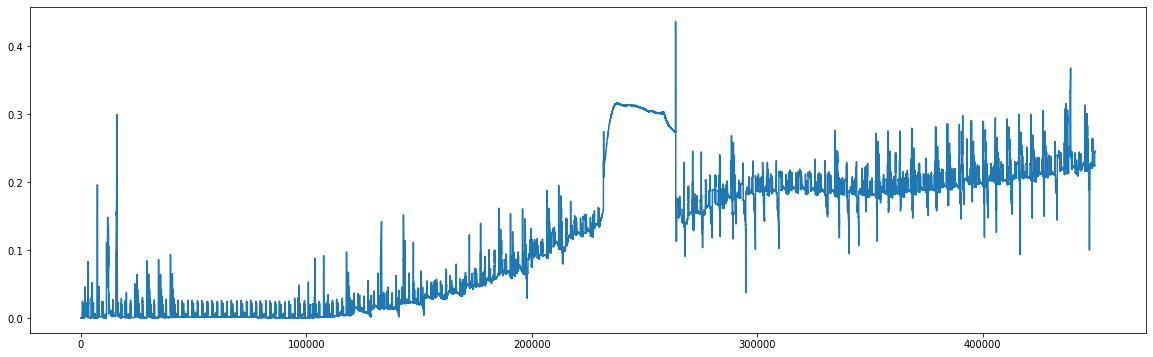

In [8]:
plt.figure(figsize=(20, 6))
plt.plot(anscore)

In [9]:
from metrics import get_statistics

In [10]:
y = test_label.to_numpy().flatten()
y.shape

(449919,)

In [11]:
amin, amax = anscore.min(), anscore.max()
amin, amax

(0.00016373934340663254, 0.4365348815917969)

In [12]:
for threshold in np.linspace(amin, amax, num=100):
    ypred = anscore > threshold
    _, a, p, r, f = get_statistics(y, ypred)
    print(f"precision:{p:.3f} recall: {r:.3f} f1: {f:.3f}")

precision:0.121 recall: 1.000 f1: 0.216
precision:0.146 recall: 0.930 f1: 0.253
precision:0.146 recall: 0.902 f1: 0.251
precision:0.149 recall: 0.900 f1: 0.255
precision:0.153 recall: 0.890 f1: 0.260
precision:0.155 recall: 0.885 f1: 0.263
precision:0.158 recall: 0.884 f1: 0.268
precision:0.162 recall: 0.884 f1: 0.274
precision:0.164 recall: 0.884 f1: 0.277
precision:0.168 recall: 0.884 f1: 0.283
precision:0.169 recall: 0.883 f1: 0.284
precision:0.171 recall: 0.878 f1: 0.286
precision:0.171 recall: 0.866 f1: 0.286
precision:0.173 recall: 0.863 f1: 0.288
precision:0.175 recall: 0.862 f1: 0.290
precision:0.177 recall: 0.861 f1: 0.294
precision:0.180 recall: 0.860 f1: 0.298
precision:0.181 recall: 0.856 f1: 0.298
precision:0.181 recall: 0.854 f1: 0.299
precision:0.182 recall: 0.852 f1: 0.299
precision:0.181 recall: 0.838 f1: 0.297
precision:0.180 recall: 0.819 f1: 0.294
precision:0.181 recall: 0.814 f1: 0.296
precision:0.181 recall: 0.807 f1: 0.296
precision:0.182 recall: 0.806 f1: 0.297


In [75]:
ypred.shape

(449919,)

In [81]:
get_statistics(y, ypred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets